In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Carregamento das imagens iniciais
imagem_antes = cv2.imread('img_1.png')
imagem_depois = cv2.imread('img_2.png')

# Verifica se as imagens foram carregadas corretamente
if imagem_antes is None or imagem_depois is None:
    raise FileNotFoundError("Uma das imagens não foi localizada.")

# Ajuste de resolução para uniformidade
resolucao = (640, 480)
antes_redimensionada = cv2.resize(imagem_antes, resolucao)
depois_redimensionada = cv2.resize(imagem_depois, resolucao)

# Conversão para tons de cinza
cinza_antes = cv2.cvtColor(antes_redimensionada, cv2.COLOR_BGR2GRAY)
cinza_depois = cv2.cvtColor(depois_redimensionada, cv2.COLOR_BGR2GRAY)

# Geração do mapa de diferença absoluta
mapa_diferenca = cv2.absdiff(cinza_depois, cinza_antes)
mapa_diferenca_norm = cv2.normalize(mapa_diferenca, None, 0, 255, cv2.NORM_MINMAX)

# Binarização da imagem de diferença
valor_limiar = 30
_, mascara_destaque = cv2.threshold(mapa_diferenca_norm, valor_limiar, 255, cv2.THRESH_BINARY)

# Criação da imagem com realce em verde nas alterações detectadas
imagem_com_destaque = depois_redimensionada.copy()
imagem_com_destaque[mascara_destaque == 255] = (0, 255, 0)


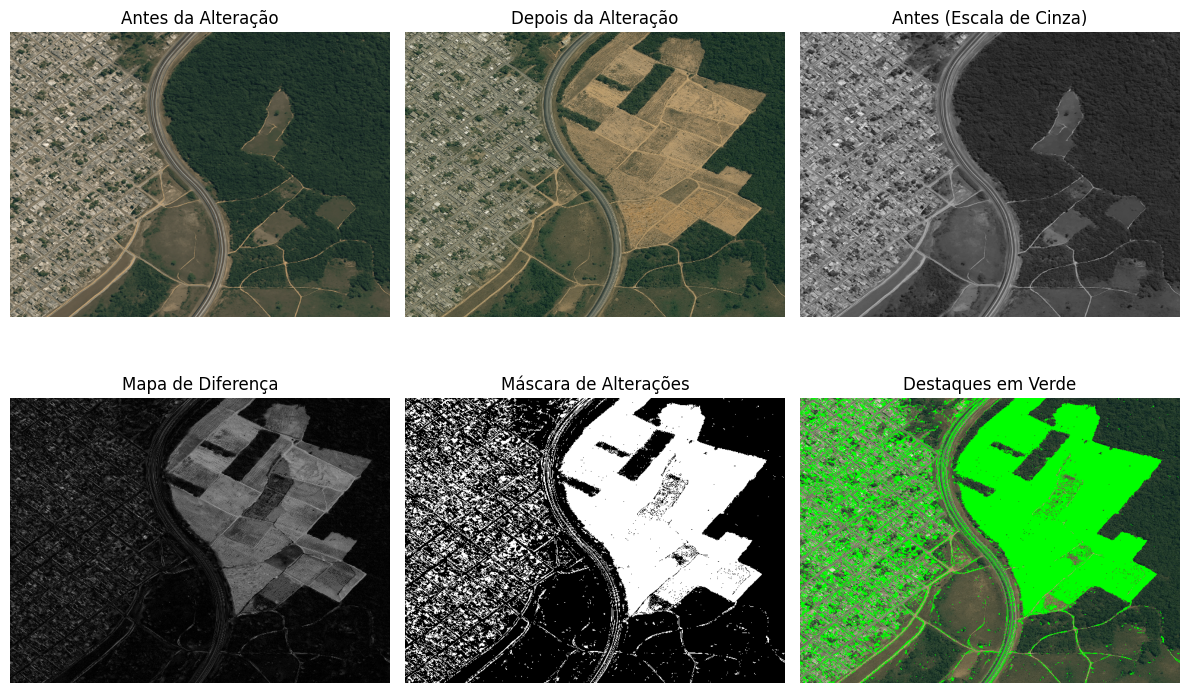

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Visualização da imagem original (antes das alterações)
plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(antes_redimensionada, cv2.COLOR_BGR2RGB))
plt.title('Antes da Alteração')
plt.axis('off')

# Visualização da imagem após as alterações
plt.subplot(2, 3, 2)
plt.imshow(cv2.cvtColor(depois_redimensionada, cv2.COLOR_BGR2RGB))
plt.title('Depois da Alteração')
plt.axis('off')

# Exibição em tons de cinza da imagem inicial
plt.subplot(2, 3, 3)
plt.imshow(cinza_antes, cmap='gray')
plt.title('Antes (Escala de Cinza)')
plt.axis('off')

# Exibição da imagem de diferença normalizada
plt.subplot(2, 3, 4)
plt.imshow(mapa_diferenca_norm, cmap='gray')
plt.title('Mapa de Diferença')
plt.axis('off')

# Visualização da máscara binária (regiões alteradas)
plt.subplot(2, 3, 5)
plt.imshow(mascara_destaque, cmap='gray')
plt.title('Máscara de Alterações')
plt.axis('off')

# Resultado final com as alterações destacadas em verde
plt.subplot(2, 3, 6)
plt.imshow(cv2.cvtColor(imagem_com_destaque, cv2.COLOR_BGR2RGB))
plt.title('Destaques em Verde')
plt.axis('off')

plt.tight_layout()
plt.show()


### Compare as imagens e analise os resultados:
• **Quais tipos de mudança a técnica conseguiu capturar bem?**

Percebe-se que as regiões onde houve retirada da vegetação — revelando o solo — foram evidenciadas de forma clara na máscara binária e, consequentemente, destacadas em verde na imagem final. Isso demonstra que a subtração entre imagens foi eficaz em identificar esse tipo específico de alteração no cenário.

• **Houve ruı́do ou falsos positivos? Como poderiam melhorar a segmentação?**

Alguns pontos, como áreas de estrada ou construções, apresentaram leves mudanças de tonalidade — provavelmente causadas por variações sazonais, iluminação ou alterações sutis — e acabaram sendo marcados incorretamente como modificações.

A aplicação de um filtro suavizador, como o desfoque Gaussiano, antes ou depois da obtenção da diferença entre imagens pode ajudar a reduzir essas pequenas inconsistências.


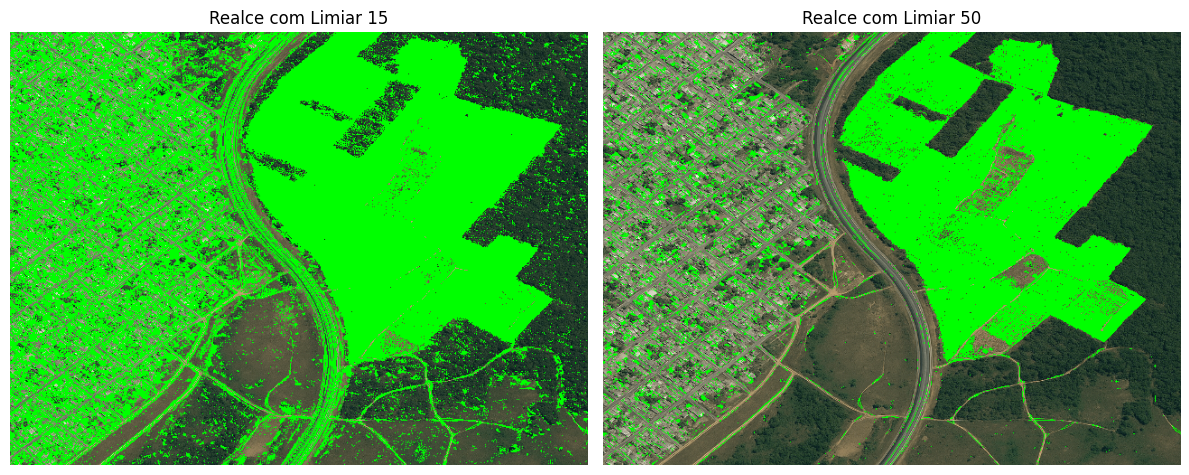

In [9]:
plt.figure(figsize=(12, 8))

# Primeiro teste: limiar mais sensível
limite_inferior = 15
_, mascara_suave = cv2.threshold(mapa_diferenca_norm, limite_inferior, 255, cv2.THRESH_BINARY)

realce_suave = depois_redimensionada.copy()
realce_suave[mascara_suave == 255] = (0, 255, 0)

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(realce_suave, cv2.COLOR_BGR2RGB))
plt.title('Realce com Limiar 15')
plt.axis('off')

# Segundo teste: limiar mais rígido
limite_superior = 50
_, mascara_rigida = cv2.threshold(mapa_diferenca_norm, limite_superior, 255, cv2.THRESH_BINARY)

realce_rigido = depois_redimensionada.copy()
realce_rigido[mascara_rigida == 255] = (0, 255, 0)

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(realce_rigido, cv2.COLOR_BGR2RGB))
plt.title('Realce com Limiar 50')
plt.axis('off')

plt.tight_layout()
plt.show()


• **O valor do limiar pode ser ajustado para controlar a sensibilidade  na detecção de alterações. Valores mais baixos detectam mudanças menores, enquanto valores mais altos focam em diferenças mais significativas. Faça alterações no limiar e comente.**

Ajustar o valor do limiar permite controlar o nível de sensibilidade da técnica. Limiar mais baixo detecta até mesmo pequenas variações de pixel, enquanto valores mais altos tendem a ignorar alterações sutis, focando em mudanças mais marcantes.

No entanto, limiares muito baixos podem gerar ruídos e falsos positivos, enquanto valores excessivamente altos podem deixar passar transformações reais porém discretas.